# AUEB M.Sc. in Data Science (part-time)

**Course**: Machine Learning and Computational Statistics

**Semester**: Winter 2018

**4th homework**

**Author**: Spiros Politis

---

In [1]:
# Imports and globals
import math
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.patches as patches
from mpl_toolkits import mplot3d

# Set random state for reproducibility
np.random_seed = 19730618

# Aesthetics for plots
plot_main_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 18,
}

plot_axis_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 14,
}

The following global function is the generator of all data sets required by the upcoming problems.

In [2]:
# Generate D data sets Di, i = 1, … ,100, 
# each one consisting of N randomly selected pairs 
# (yn, xn), n = 1, … , N from p(y,x)
def generate_data_set(means, covariance_matrix, num_observations = 1, num_samples = 1, ):
    data_set = np.zeros((num_samples, 2, num_observations))
    
    for i in range (0, num_observations):
        #data_set[:, :, i] = scipy.stats.multivariate_normal.rvs(means, covariance_matrix, size = num_samples)
        data_set[:, :, i] = np.random.multivariate_normal(means, covariance_matrix, size = num_samples)
        
    return data_set

---

<u>**Exercise 1**:</u>

<mark>**Answer (a)**</mark>

The MSE of the estimator, $E_{D} [ (f(\boldsymbol{x};D) - E[y|\boldsymbol{x}])^{2} ]$, expresses both the variance and bias terms if written as:

$E_{D} [ (f(\boldsymbol{x};D) - E[y|\boldsymbol{x}])^{2} ] =$

$E_{D} [ (f(\boldsymbol{x};D) - E_{D}[ f(\boldsymbol{x};D) ])^{2} ] + ( E_{D}[ (f(\boldsymbol{x};D) ] - E[ y|\boldsymbol{x} ] )^{2}$

with

$E_{D} [ (f(\boldsymbol{x};D) - E_{D}[ f(\boldsymbol{x};D) ])^{2} ]$: the **variance** of the estimator

and

$( E_{D}[ (f(\boldsymbol{x};D) ] - E[ y|\boldsymbol{x} ] )^{2}$: the **bias** of the estimator

Theoretically, the quantity becomes zero when:

$E_{D} [ (f(\boldsymbol{x};D) - E_{D}[ f(\boldsymbol{x};D) ])^{2} ] + ( E_{D}[ (f(\boldsymbol{x};D) ] - E[ y|\boldsymbol{x} ] )^{2} = 0 \implies$

$E_{D} [ (f(\boldsymbol{x};D) - E_{D}[ f(\boldsymbol{x};D) ])^{2} ] = ( E_{D}[ (f(\boldsymbol{x};D) ] - E[ y|\boldsymbol{x} ] )^{2}$

<mark>**Answer (b)**</mark>

In theory, both terms can be reduced by increasing the number of samples N that we have from a population while also making sure that our model complexity is sufficiently large w.r.t. Occam's razor principle.

However, in most cases we do not have access to a sample large enough to approach the true population parameters, therefore we are not able to reduce the noise of the data.

---

<u>**Exercise 2**:</u>

Let us first underline that we are considering the case where $x$, $y$ are **continuous** random variables.

<mark>**Answer (a)**</mark>

In order for the function to be a PDF, its integral must be 1:

$\int_0^1 \int_{x^{2}}^1 \frac{3}{2} \mathrm{d}y \mathrm{d}x =$
$\int_0^1 \int_{x^{2}}^1 \frac{3y}{2} \mathrm{d}y \mathrm{d}x =$
$\int_0^1 \left( \frac{3y}{2} \middle|_{x^{2}}^1 \right) \mathrm{d}x =$
$\int_0^1 \left( \frac{3}{2} - \frac{3x^{2}}{2} \right) \mathrm{d}x =$
$\left. \frac{3x}{2} - \frac{3x^{3}}{6} \right|_0^1 =$
$\frac{3}{2} - \frac{3}{6} = $
$1$

<mark>**Answer (b)**</mark>

The marginal PDF of $X$, $f_{X}(x)$, is given by: 

$f_{X}(x) =$
$\int_{x^{2}}^{1} \frac{3}{2} \mathrm{d}y =$
$\left. \frac{3}{2}y \right|_{x^{2}}^1 = $
$\frac{3}{2} - \frac{3}{2} x^{2} =$
$\frac{3}{2}(1 - x^{2})$

<mark>**Answer (c)**</mark>

The conditional PDF of $y$ given $x$ is:

$f(y|x) = $
$\frac{f(x, y)}{f_{X}(x)} = $
$\frac{\frac{3}{2}}{\frac{3}{2}(1 - x^{2})} =$
$\frac{1}{1 - x^{2}}$

<mark>**Answer (d)**</mark>

$E[y|x] =$
$\int_{x^{2}}^{1} y \frac{1}{1-x^{2}} \mathrm{d}y =$
$\frac{1}{1-x^{2}} \int_{x^{2}}^{1} y \mathrm{d}y =$
$\left( \frac{1}{1-x^{2}} \right) \left( \left. \frac{y^{2}}{2} \right|_{x^{2}}^1 \right) =$
$\frac{1}{1-x^{2}} \frac{1 - x^{4}}{2} =$
$\frac{1-x^{4}}{2-2x^{2}} = $
$\frac{-(x^{4} - 1)}{-2(x^{2} - 1)} =$
$\frac{x^{4} - 1}{2(x^{2} - 1)} =$
$\frac{(x^{2})^{2} - 1^{2}}{2(x^{2} - 1)} =$
$\frac{(x^{2} + 1)(x^{2} - 1)}{2(x^{2} - 1)} =$
$\frac{x^{2} + 1}{2}$

<img src="parabola.jpg">

---

<u>**Exercise 3 (python code + text)**:</u>

In [3]:
# Define bivariate normal distribution parameters
# Define μ_y, μ_x
mu_x_3 = 2
mu_y_3 = 2

# Define σ^2_y, σ^2_x
variance_x_3 = 4
variance_y_3 = 3

# Define σ_yx
std_yx_3 = 2 

# Define the means and covariance matrices
# The means and covariance matrices are given in the form scipy expects
means_3 = np.array([mu_x_3, mu_y_3])
covariance_matrix_3 = np.array([[variance_x_3, std_yx_3], [std_yx_3, variance_y_3]])

In [4]:
# Model a Gaussian noise process
def eta(mean = 0, variance = 1, size = 1):
    return np.random.normal(loc = mean, scale = variance, size = size)

<mark>**Answer (a)**</mark>

Since $y$ and $x$ are jointly distributed with $p(y,x) = N(\boldsymbol{\mu}, \Sigma)$, $\hat{g}(x)$ is a linear (affine) function of $\boldsymbol{x}$.

We know from theory that $\hat{g}(x) = E[y|x] = \mu_{y} + \frac{\alpha \sigma_{y}}{\sigma_{x}}(x - \mu_{x})$, $\alpha = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$.

Therefore, our optimal estimator is:



$\alpha = \frac{2}{2 \cdot 1.73} = 0.58$

$\hat{g}(x) = E[y|x] = 2 + \frac{0.58 \cdot 1.73}{2}(x - 2) = 2 + 0.5(x - 2) = 0.5x + 1$

In [5]:
# Compute g'(x) = E[y|x]
def g_hat(x, means, covariance_matrix):
    # Compute α = σxy / σxσy
    alpha = covariance_matrix[0, 1] / (np.sqrt(covariance_matrix[0, 0]) * np.sqrt(covariance_matrix[1, 1]) )
    
    # Compute μy + (ασy / σx)(x - μx)
    result = means[0] + ( (alpha * np.sqrt(covariance_matrix[1, 1]) / np.sqrt(covariance_matrix[0, 0]) * (x - means[0])) )
    
    return result

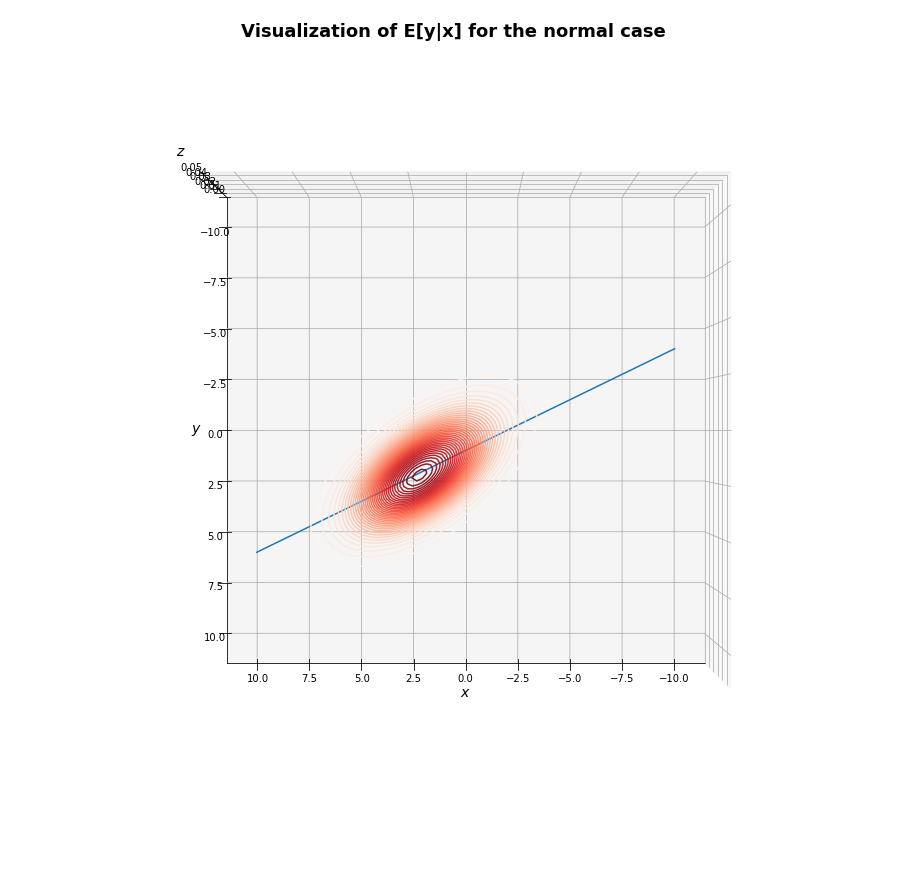

In [6]:
# Plot the distribution
fig, ax = plt.subplots(figsize = (16, 16), sharey = True)
ax = plt.axes(projection = "3d")
ax.view_init(elev = 90, azim = 90)

x = np.linspace(-10, 10, 10)
ax.plot(x, g_hat(x, means_3, covariance_matrix_3))

x, y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
pos = np.empty(x.shape + (2, ))
pos[:, :, 0] = x
pos[:, :, 1] = y
mn = scipy.stats.multivariate_normal(means_3, covariance_matrix_3)

# Plot the joint distribution
ax.contour(x, y, mn.pdf(pos), 50, cmap = "Reds", alpha = 0.9)

# Set plot title
ax.set_title("Visualization of E[y|x] for the normal case", fontdict = plot_main_title_font, pad = 40)

# Set plot axis labels
ax.set_xlabel(r"$x$", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_ylabel(r"$y$", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_zlabel(r"$z$", fontdict = plot_axis_title_font, labelpad = 10)

pass;

<mark>**Answer (b)**</mark>

In [7]:
# Problem parameters
# Data set size
D_3_b = 100
# Sample size
N_3_b = 50

In [8]:
# Generate the data set
data_set_3_b = generate_data_set(means_3, covariance_matrix_3, num_observations = D_3_b, num_samples = N_3_b)

Plotting the joint PDF as well as a few samples from our generated data set for sanity check:

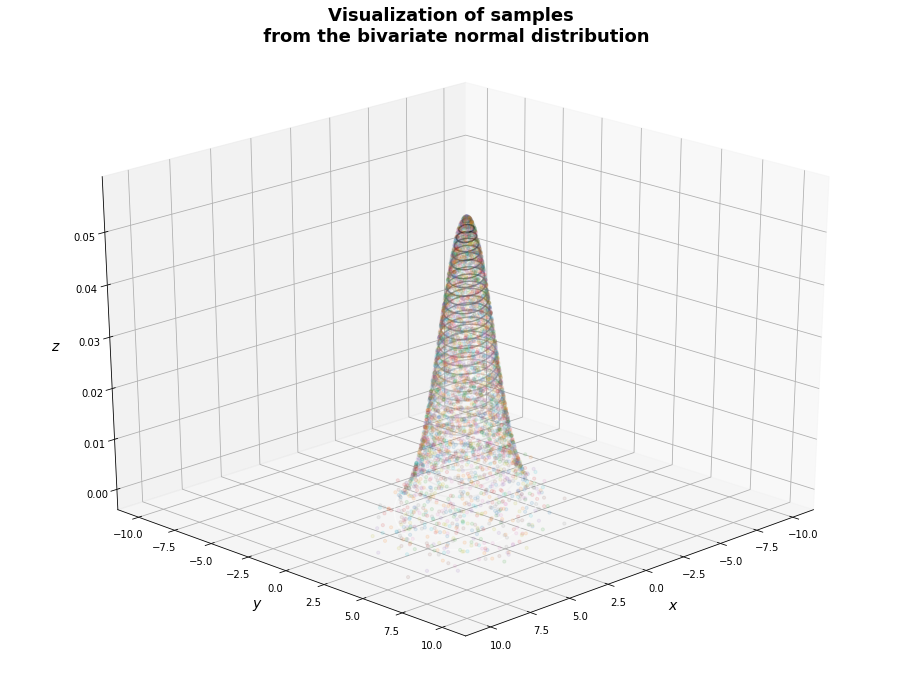

In [9]:
# Plot the distribution
fig, ax = plt.subplots(figsize = (16, 12), sharey = True)
ax = plt.axes(projection = "3d")
ax.view_init(elev = 25, azim = 45)

# Create data grid for the bivariate PDF
x, y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
sample = np.empty(x.shape + (2, ))
sample[:, :, 0] = x
sample[:, :, 1] = y
mn = scipy.stats.multivariate_normal(means_3, covariance_matrix_3)

# Plot the bivariate PDF
ax.contour(x, y, mn.pdf(sample), 50, cmap = "Greys", alpha = 0.6)

# Plot a sample of the data points for verification
for i in range (0, D_3_b):
    ax.scatter3D(data_set_3_b[:, 0, i], data_set_3_b[:, 1, i], mn.pdf(data_set_3_b[:, :, i]), alpha = 0.1, s = 10, label = "D_" + str(i))

# Set plot title
ax.set_title("Visualization of samples \n from the bivariate normal distribution", fontdict = plot_main_title_font, pad = 40)

# Set plot axis labels
ax.set_xlabel(r"$x$", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_ylabel(r"$y$", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_zlabel(r"$z$", fontdict = plot_axis_title_font, labelpad = 10)

pass;

It appears that our sample points follow the specifications provided.

<mark>**Answer (c)**</mark>

We assume that the function of our estimator is linear i.e. of the form:


$f(x; D) = \theta_{0} + \theta_{1}x = \begin{bmatrix} \theta_{0} & \theta_{1} \end{bmatrix}^{T} \begin{bmatrix} 1 \\ x \end{bmatrix} = \boldsymbol{\theta}^{T} \boldsymbol{x}$

In [10]:
POLY_ORDER = 1

In [11]:
'''
    Returns a nth order polynomially transformed matrix of original X,
    including ones at X[:, 0] so at to be readily available for linear modelling 
    
    :param X: Numpy matrix (X)
    :param order: polynomial order
    
    :returns: Numpy matrix
'''
def poly(X, order = 8):
    # Initialize a X.shape[0]x(order + 1) matrix (nth order poly plus ones)
    X_poly = np.zeros(shape = (X.shape[0], order + 1))
    
    # Ones
    X_poly[:, 0] = 1
    
    # Raise to the i-th power
    for i in range(1, order + 1):
        X_poly[:, i] = np.power(X, i).reshape(X.shape[0])
    
    return X_poly

In [12]:
'''
    Vectorized implementation of computing the estimated θ vector (theta hat).
    
    :param X: Numpy matrix (X)
    :param y: Numpy vector (y)
    
    :returns: Numpy column vector (theta hat)
'''
def compute_theta_hat_ols(X, y):
    # Calculate X.T * X
    XTX = np.dot(X.T, X)

    # Calculate the inverse of X.T * X
    XTX_inv = np.linalg.inv(XTX)
    
    # Calculate theta estimate
    theta_hat_ols = XTX_inv.dot(X.T).dot(y)
    
    return theta_hat_ols

In [13]:
'''
    Get all estimators for f(x;Di)
    
    :returns: Numpy Nx2 matrix
'''
def theta_hat_f_Di(data_set, num_observations = 1):
    # Nx2 matrix of theta parameters
    # POLY_ORDER + 1 to acommodate theta_0
    theta_hat_Di = np.zeros((num_observations, POLY_ORDER + 1))
    
    for i in range (0, num_observations):
        X = poly(data_set[:, 0, i], order = POLY_ORDER)
        y = data_set[:, 1, i]
        
        # Get the estimated parameter vector theta
        theta_hat_Di[i] = compute_theta_hat_ols(X, y)
    
    return theta_hat_Di

<mark>**Answer (d)**</mark>

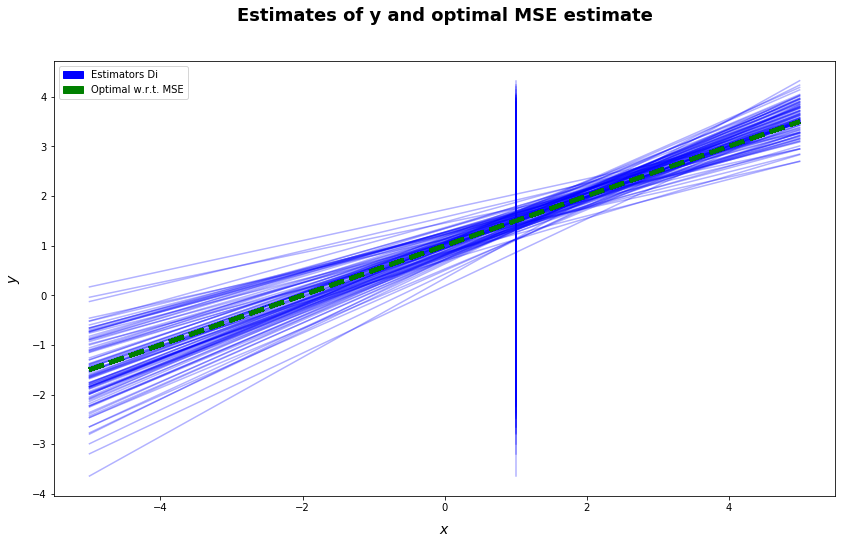

In [14]:
# Get the matrix of estimated parameters theta
theta_hat_Di = theta_hat_f_Di(data_set_3_b, num_observations = D_3_b)

# Plot
fig, ax = plt.subplots(figsize = (14, 8), sharey = True)

for i in range (0, D_3_b):
    X_sample_ols = np.column_stack([
        poly(np.linspace(-5, 5, 100), order = POLY_ORDER),
    ])
    
    y_sample_ols = X_sample_ols.dot(theta_hat_Di[i].T)
    
    # Plot the estimators Di
    ax.plot(X_sample_ols, y_sample_ols, alpha = 0.3, label = "D_" + str(i), color = "b")
    
    # Plot the optimum w.r.t. the MSE criterion
    X_sample_opt = np.linspace(-5, 5, 100)
    y_sample_opt = g_hat(X_sample_opt, means_3, covariance_matrix_3)
    ax.plot(X_sample_opt, y_sample_opt, alpha = 0.7, label = "O", color = "g", linewidth = 4, linestyle = "--")
    
# Set plot title
ax.set_title("Estimates of y and optimal MSE estimate", fontdict = plot_main_title_font, pad = 40)

# Set plot axis labels
ax.set_xlabel(r"$x$", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_ylabel(r"$y$", fontdict = plot_axis_title_font, labelpad = 10)

# Set plot legend
blue_label = patches.Patch(color = "b", label = "Estimators Di")
green_label = patches.Patch(color = "g", label = "Optimal w.r.t. MSE")
ax.legend(handles = [blue_label, green_label])

pass;

<mark>**Answer (e)**</mark>

In [15]:
# Problem parameters
# Data set size
D_3_e = 100
# Sample size
N_3_e = 5000

In [16]:
# Generate the data set
data_set_3_e = generate_data_set(means = means_3, covariance_matrix = covariance_matrix_3, num_observations = D_3_e, num_samples = N_3_e)

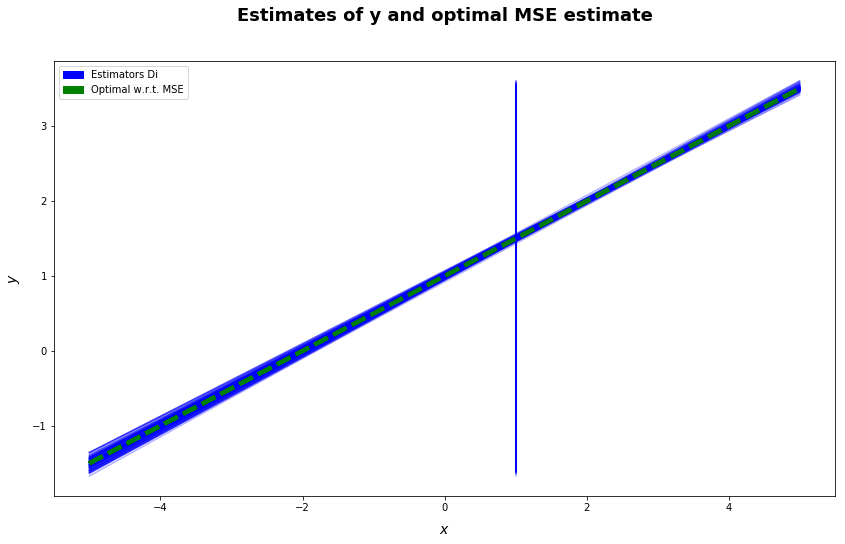

In [17]:
# Get the matrix of estimated parameters theta
theta_hat_Di = theta_hat_f_Di(data_set_3_e, num_observations = D_3_e)

# Plot
fig, ax = plt.subplots(figsize = (14, 8), sharey = True)

# 
for i in range (0, D_3_e):
    X_sample_ols = np.column_stack([
        poly(np.linspace(-5, 5, 100), order = POLY_ORDER),
    ])
    
    y_sample_ols = X_sample_ols.dot(theta_hat_Di[i].T)
    
    ax.plot(X_sample_ols, y_sample_ols, alpha = 0.3, label = "D_" + str(i), color = "b")
    
    # Plot the optimum w.r.t. the MSE criterion
    X_sample_opt = np.linspace(-5, 5, 100)
    ax.plot(X_sample_opt, g_hat(X_sample_opt, means_3, covariance_matrix_3), alpha = 0.7, label = "O", color = "g", linewidth = 4, linestyle = "--")
    
# Set plot title
ax.set_title("Estimates of y and optimal MSE estimate", fontdict = plot_main_title_font, pad = 40)

# Set plot axis labels
ax.set_xlabel(r"$x$", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_ylabel(r"$y$", fontdict = plot_axis_title_font, labelpad = 10)

# Set plot legend
blue_label = patches.Patch(color = "b", label = "Estimators Di")
green_label = patches.Patch(color = "g", label = "Optimal w.r.t. MSE")
ax.legend(handles = [blue_label, green_label])

pass;

<mark>**Answer (f)**</mark>

As expected, the increased size of our observations ($N = 5000$) leads to reduced variance and bias of the estimators which converge around the optimum estimator $E[y|x]$.

Also our adopted model is linear, exactly as the optimum estimator computed in ste (a). The combination of a larger N of samples with the optimal model parameters leads us to a reduced variance and bias estimator.

---

<u>**Exercise 4 (python code + text):**</u>

<mark>**Answer (a)**</mark>

In [18]:
# Problem parameters
# Data set size
D_4_a = 1
# Sample size
N_4_a = 100

In [19]:
# Generate the data set
data_set_4_a = generate_data_set(means = means_3, covariance_matrix = covariance_matrix_3, num_observations = D_4_a, num_samples = N_4_a)

<mark>**Answer (b)**</mark>

In [20]:
# Compute theta OLS
theta_hat_Di = theta_hat_f_Di(data_set_4_a, num_observations = D_4_a)

X_sample_ols = np.column_stack([
    poly(np.linspace(-5, 5, 100), order = 1),
])
y_sample_ols = X_sample_ols.dot(theta_hat_Di[0].T)

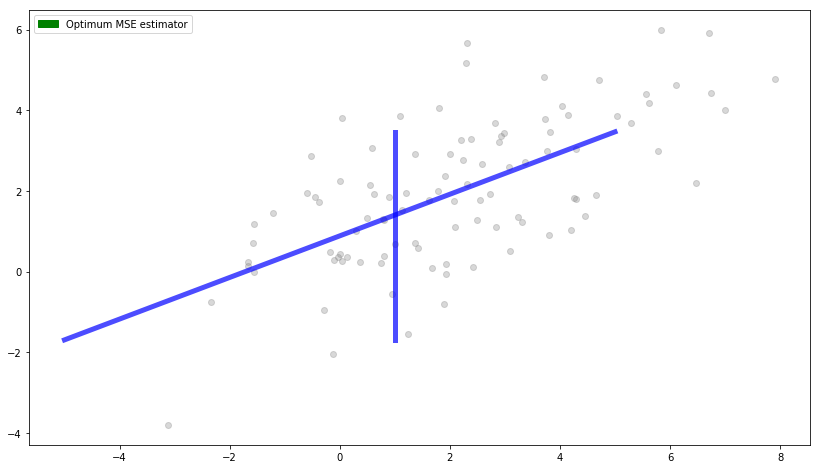

In [21]:
# Get the optimal estimator
# x_4_b = data_set_4_a[:, 0, 0]
# y_4_b = g_hat(data_set_4_a[:, 0, 0], means_3, covariance_matrix_3)

# Plot
fig, ax = plt.subplots(figsize = (14, 8), sharey = True)

# Plot the data set random points
ax.plot(data_set_4_a[:, 0, 0], data_set_4_a[:, 1, 0], "o", alpha = 0.3, color = "grey", lw = 5)

# Plot the optimum MSE extimator E[y|x]
#ax.plot(x_4_b, y_4_b, "-", alpha = 0.7, color = "g", lw = 5)

# Plot the optimum MSE extimator E[y|x]
ax.plot(X_sample_ols, y_sample_ols, "-", alpha = 0.7, color = "b", lw = 5)

# Set plot legend
blue_label = patches.Patch(color = "g", label = "Optimum MSE estimator")
ax.legend(handles = [blue_label])

pass;

<mark>**Answer (c)**</mark>

In [22]:
# Problem parameters
# Data set size
D_4_c = 50
# Sample size
N_4_c = 50

In [23]:
# Generate the data set
data_set_4_c = generate_data_set(means = means_3, covariance_matrix = covariance_matrix_3, num_observations = D_4_c, num_samples = N_4_c)

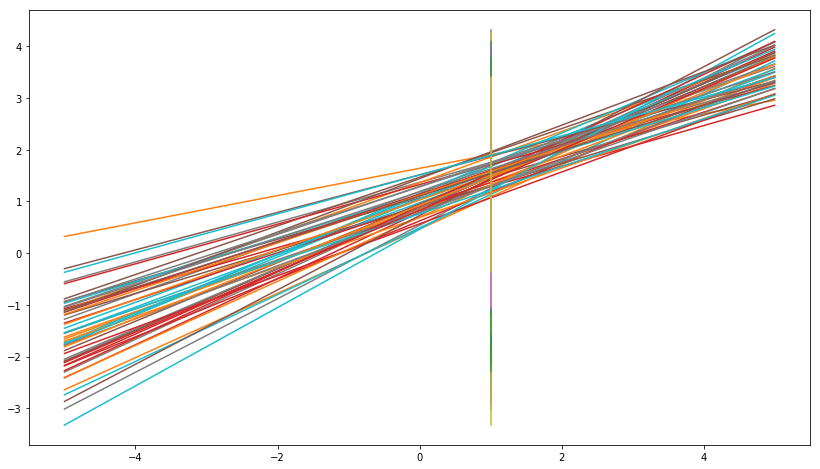

In [24]:
# Compute all estimates E[y|x]
theta_hat_Di = theta_hat_f_Di(data_set_4_c, num_observations = D_4_c)

# Plot
fig, ax = plt.subplots(figsize = (14, 8), sharey = True)

for i in range (0, D_4_c):
    X_sample_ols = np.column_stack([
        poly(np.linspace(-5, 5, 100), order = POLY_ORDER),
    ])
    
    y_sample_ols = X_sample_ols.dot(theta_hat_Di[i].T)

    plt.plot(X_sample_ols, y_sample_ols)
    
# # Set plot title
# ax.set_title("Estimates of y and optimal MSE estimate", fontdict = plot_main_title_font, pad = 40)

# # Set plot axis labels
# ax.set_xlabel(r"$x$", fontdict = plot_axis_title_font, labelpad = 10)
# ax.set_ylabel(r"$y$", fontdict = plot_axis_title_font, labelpad = 10)

# # Set plot legend
# blue_label = patches.Patch(color = "b", label = "Estimators Di")
# green_label = patches.Patch(color = "g", label = "Optimal w.r.t. MSE")
# ax.legend(handles = [blue_label, green_label])

pass;

<mark>**Answer (d)**</mark>

<mark>**Answer (e)**</mark>

---

<u>**Exercise 5 (python code + text):**</u>

In [25]:
# Problem parameters
# Data set size
D_5 = 1
# Sample size
N_5 = 100

In [26]:
# Generate the data set
data_set_5 = generate_data_set(means = means_3, covariance_matrix = covariance_matrix_3, num_observations = D_5, num_samples = N_5)

<mark>**Answer (a)**</mark>

In [27]:
for i in range(0, N_5):
    x = data_set_5[i, 0, 0]
    y = g_hat(x, means_3, covariance_matrix_3)

<mark>**Answer (b)**</mark>

In [28]:
# Get optimal MSE estimate based on data_set_5
x_opt = data_set_5[:, 0, 0]
y_opt = g_hat(x, means_3, covariance_matrix_3)

# Convert xn, yn to matrix form
x_n_y_n = np.zeros((N_5, 2))
x_n_y_n[:, 0] = x_opt
x_n_y_n[:, 1] = y_opt

# Compute the means matrix
means_5 = np.array([
    np.sum(data_set_5[:, 0, 0]) / N_5,
    np.sum(data_set_5[:, 1, 0]) / N_5
])

# Compute the covariance matrix
covariance_matrix_5 = np.cov(data_set_5[:, 0, 0], data_set_5[:, 1, 0])

print("Means")
print("---------------------------------------")
print(means_5)
print("\n")
print("Covariance matrix")
print("---------------------------------------")
print(covariance_matrix_5)

Means
---------------------------------------
[1.90043889 1.88722585]


Covariance matrix
---------------------------------------
[[4.413627   2.50637577]
 [2.50637577 3.36494267]]


<mark>**Answer (c)**</mark>

In [29]:
# Generate the data set
data_set_5_c = generate_data_set(means = means_5, covariance_matrix = covariance_matrix_5, num_observations = D_5, num_samples = N_5)

In [30]:
# Get optimal MSE estimate based on data_set_5
x_opt = data_set_5_c[:, 0, 0]
y_opt = g_hat(x, means_5, covariance_matrix_5)

<mark>**Answer (b)**</mark>

---